## Flight Price:

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

### Ans:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

### Ans:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


/tmp/ipykernel_77/2827005540.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Price'],shade=True,color='r')# Plots density function


<AxesSubplot: xlabel='Price', ylabel='Density'>

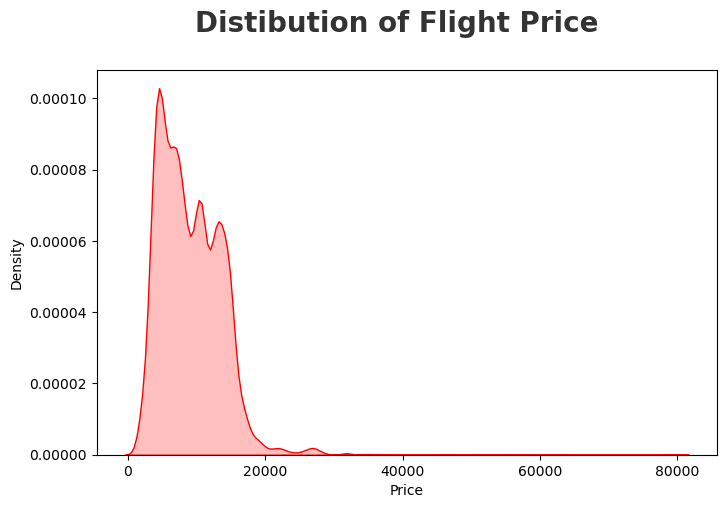

In [7]:
plt.figure(figsize=(8,5))
plt.suptitle('Distibution of Flight Price',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
sns.kdeplot(x=df['Price'],shade=True,color='r')# Plots density function

### Observation
Price is right skewed.

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

### Ans:

In [8]:
print('Minimum price:',df['Price'].min())
print('Maximum price:',df['Price'].max())
print('Range of price:',(df['Price'].min(),df['Price'].max()))

Minimum price: 1759
Maximum price: 79512
Range of price: (1759, 79512)


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

### Ans:

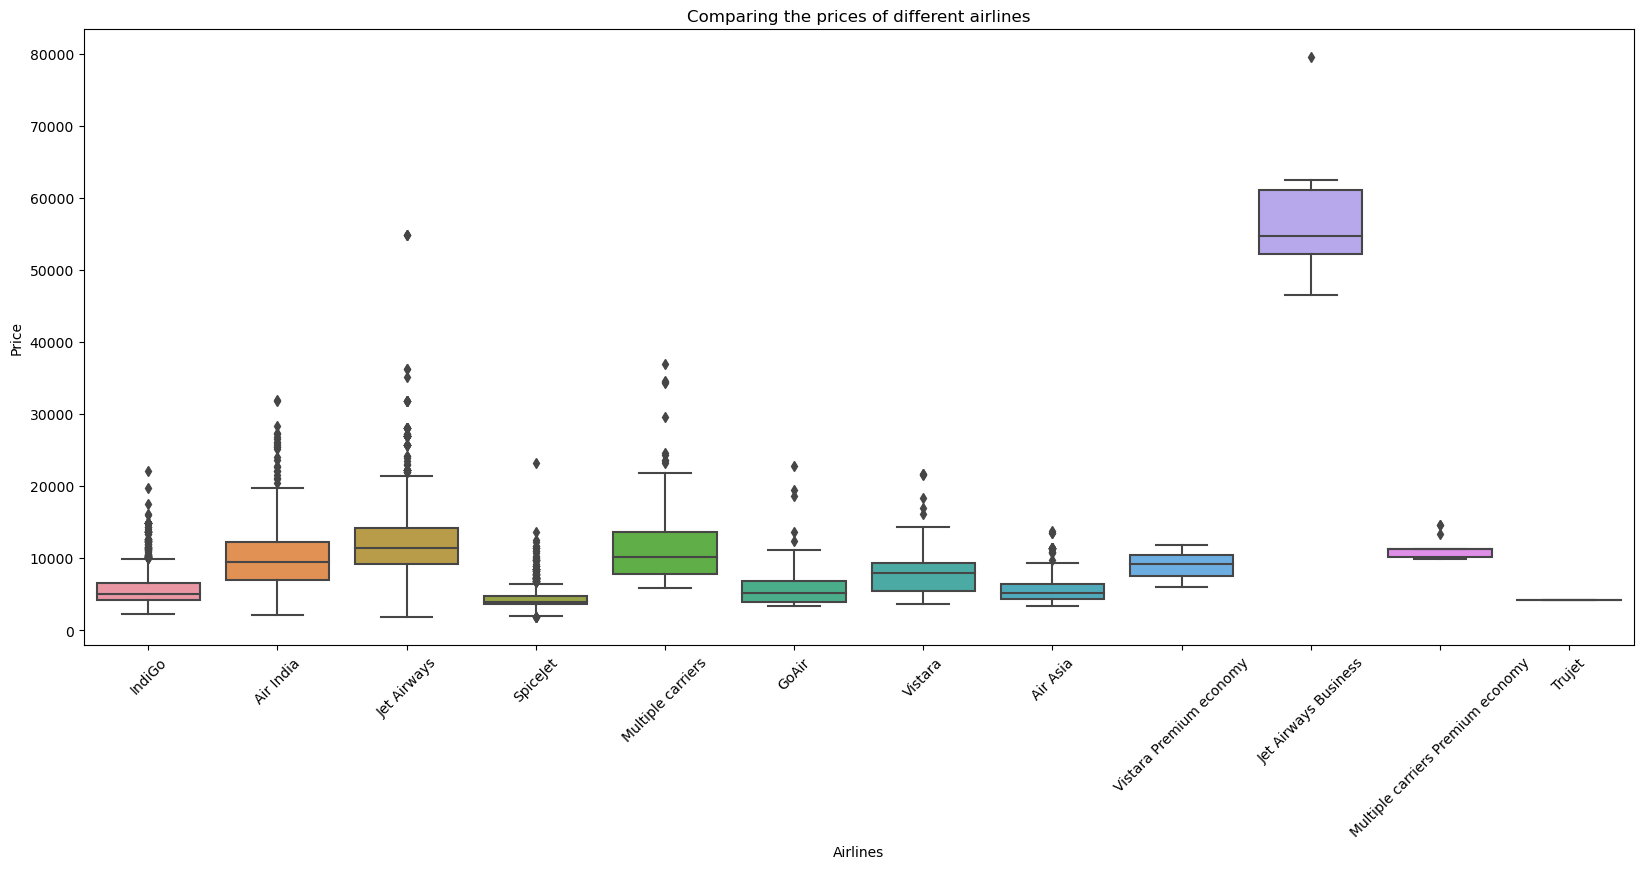

In [20]:
plt.figure(figsize=(20,8))
sns.boxplot(x = 'Airline',y ='Price',data=df,width=0.8)
plt.xticks(rotation=45) # Names of the bars are kept in 45 degrees
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Comparing the prices of different airlines')
plt.show()

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

### Ans:

Yes. All airlines have outliers in their flight price except "Vistara Premium economy" and "Trujet". 

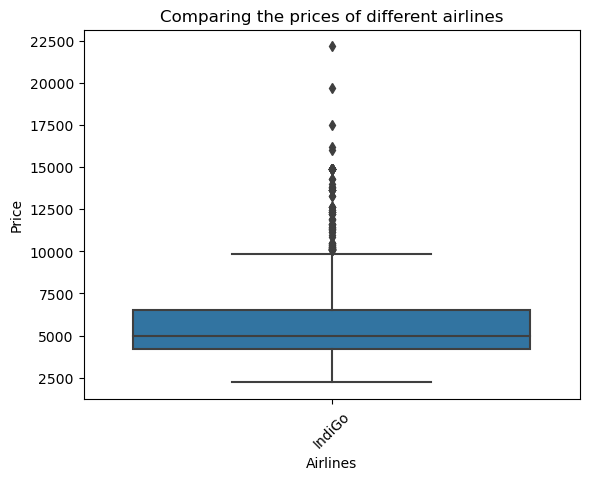

In [37]:
df1 = pd.DataFrame()
df1 = df[df['Airline']=='IndiGo']
sns.boxplot(x = 'Airline',y ='Price',data=df1,width=0.8)
plt.xticks(rotation=45) # Names of the bars are kept in 45 degrees
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Comparing the prices of different airlines')
plt.show()

So from the figure it is clear that airline 'IndiGo' has lot of outliers.

Outliers in a boxplot can have a significant impact on your data analysis in various ways. A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a summary of the data's central tendency, spread, and the presence of outliers. Outliers are data points that significantly differ from the majority of the data. Here's how outliers may impact our analysis:

1. Skewing Descriptive Statistics:
   - Outliers can substantially affect summary statistics like the mean and standard deviation. The mean is sensitive to extreme values, and the presence of outliers can lead to an overestimation or underestimation of the central tendency. The standard deviation may also be inflated, making the data appear more variable than it actually is.

2. Misrepresentation of Central Tendency:
   - The median (the middle value when data is sorted) is less affected by outliers compared to the mean. Outliers can pull the mean away from the median, giving a false impression of the data's central location.

3. Impact on Visualization:
   - Outliers can make the boxplot's "whiskers" appear longer than they should be, making it seem like the data is more spread out than it is. This can affect how we perceive the data's dispersion.

4. Influence on Hypothesis Testing:
   - In hypothesis testing, outliers can have a significant impact on results. They might lead to incorrect rejection or acceptance of hypotheses, especially when using tests like t-tests or ANOVA, which assume normal distributions.

5. Regression Analysis:
   - In regression analysis, outliers can have a disproportionate effect on the regression coefficients, leading to incorrect inferences about relationships between variables. It's important to detect and handle outliers before conducting regression analysis.

6. Data Normality Assumptions:
   - Many statistical tests assume that the data is normally distributed. Outliers can violate this assumption, potentially leading to incorrect conclusions in tests like the chi-square test or analysis of variance (ANOVA).

7. Data Interpretation:
   - Outliers might be legitimate data points representing rare events or measurement errors. Understanding the source and nature of outliers is crucial for drawing meaningful conclusions from our analysis.

8. Robustness of Methods:
   - Some statistical methods and algorithms are more robust to outliers than others. It's important to choose methods that are appropriate for our data, especially when dealing with outliers.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

### Ans:

1. Date_of_Journey:
- Examine the distribution of flight prices throughout the year. This can be done by grouping data by month or season and calculating the average prices for each period.

2. Destination:
- Analyze flight prices by destination to identify which locations experience peak seasons at different times. Some destinations may have different peak seasons due to climate, holidays, or special events.

    Prepare a report or presentation for our boss with the following components:

a. Executive Summary: Start with a brief overview of our analysis and the main findings.

b. Visualizations: Include the line plots and bar charts that illustrate the seasonal trends in flight prices.

c. Peak Season Identification: Clearly state which months or seasons exhibit the highest flight prices and why. Mention any insights we gained regarding peak travel destinations.

d. Historical Comparison: If historical data is available, compare the current year's findings with previous years to identify trends and validate the results.

e. Recommendations: Based on our analysis, provide recommendations to the travel agency. This might include adjusting pricing, marketing strategies, or offering promotions during off-peak seasons.

f. Limitations: Acknowledge any limitations in the data or analysis, such as missing data or potential anomalies.

g. Conclusion: Summarize your findings and emphasize the importance of targeting the identified peak travel seasons.

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

### Ans:

1. Departure Date:
- Analyze how flight prices vary over time by grouping data by date, month, or season. This can help identify seasonality and trends.

2. Destination:
- Examine whether flight prices to different destinations follow distinct patterns or trends. Some destinations may have more stable prices, while others may experience significant fluctuations.

3. Flight Duration:
- Explore whether flight duration has an impact on prices. Longer flights may have higher prices, and you can investigate this relationship.

4. Airline:
- Investigate if there are price variations based on the airline. Different airlines may have different pricing strategies.

The data visualizations to present our findings effectively. Consider the following visualizations:

a. Time Series Line Plot: Create a time series line plot with time (e.g., month or date) on the x-axis and flight prices on the y-axis to visualize price trends over time.

b. Box Plot: Use box plots to visualize the distribution of prices by destination, airline, or other categorical variables.

c. Scatter Plot: Create scatter plots to examine the relationship between flight duration and prices. This can help identify any trends related to flight length.

d. Bar Chart: Use bar charts to compare average flight prices for different destinations, airlines, or time periods.

e. Heatmap: A heatmap can help visualize correlations between different features, such as the correlation between the day of the week and flight prices.

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

### Ans:

The features I will use to find the factors affecting price of the flight are:
1. Date_of_Jouney
2. Duration
3. Total stops

    Prepare a report or presentation for the management team with the following components:

a. Executive Summary: Provide an overview of our analysis and the key factors affecting flight prices.

b. Visualizations: Include the visualizations mentioned above to illustrate the relationships and trends.

c. Factor Identification: Clearly state the factors that have a significant impact on flight prices and the direction of the impact (e.g., positive or negative).

d. Recommendations: Provide actionable recommendations based on our findings, such as pricing strategies, marketing initiatives, and route optimization.

e. Limitations: Address any limitations in the data or analysis, such as data quality issues or omitted variables.

f. Conclusion: Summarize our findings and emphasize their relevance to the airline's pricing and business strategies.

## Google Playstore:

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

### Ans:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 10841
No. of columns in the dataset: 13


### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

### Ans:

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


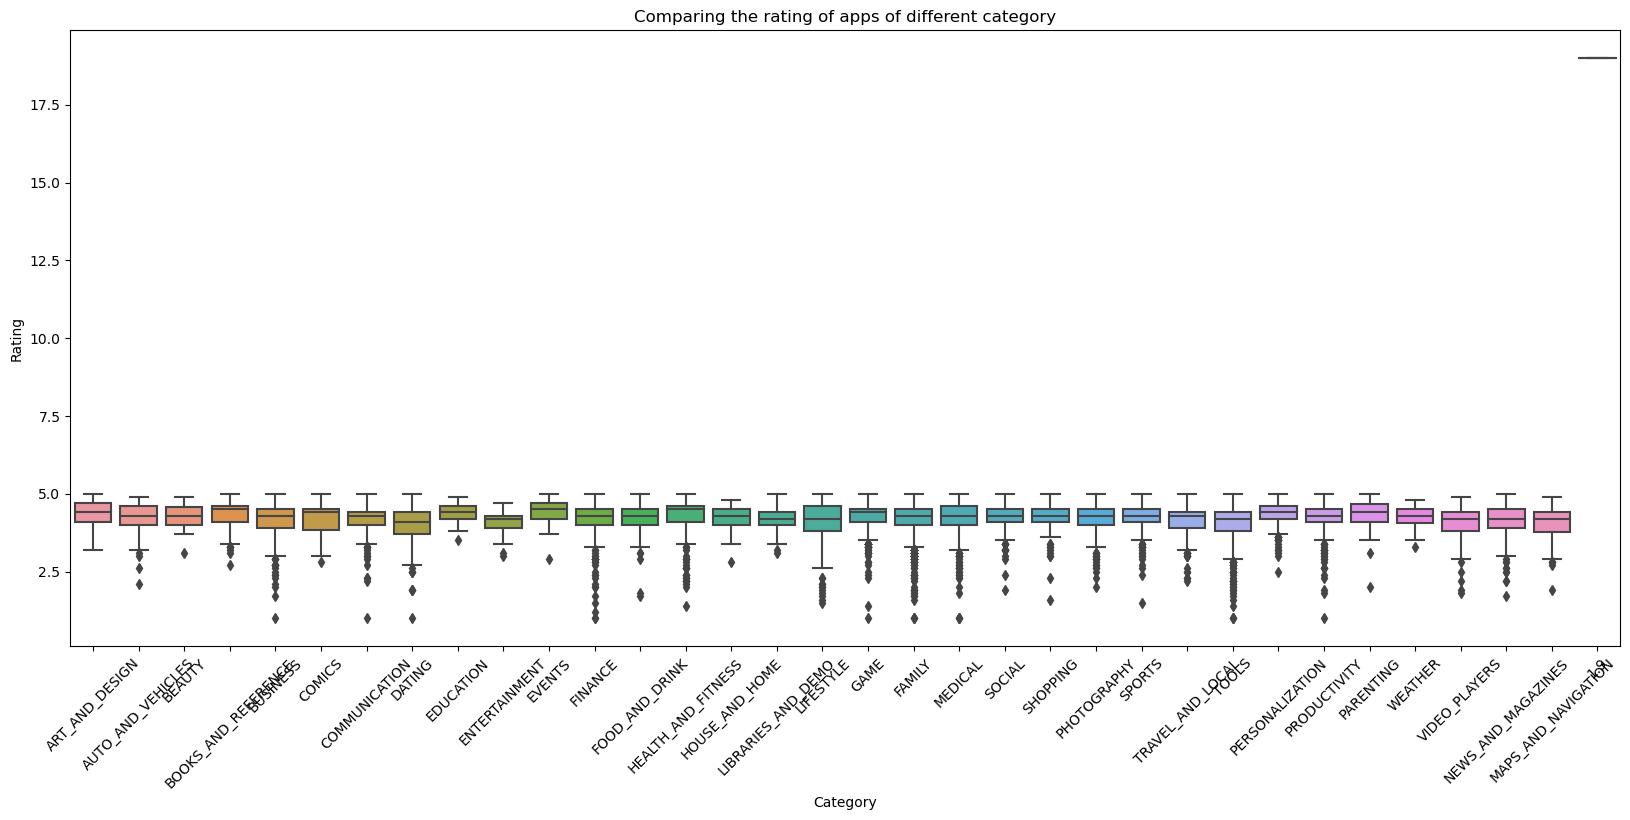

In [5]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Category',y='Rating',data=df,width=0.8)
plt.xticks(rotation=45) # Names of the bars are kept in 45 degrees
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Comparing the rating of apps of different category')
plt.show()

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

### Ans:

In [6]:
## Checking the number of missing value in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

### Ans:

In [7]:
## Cleaning 'Size' feature
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [8]:
## Checking 'Size' feature has null value
df['Size'].isnull().sum()

0

In [9]:
df['Size'] = df['Size'].str.replace('M','000') # Converting the Million (M) to thounsand unit
df['Size'] = df['Size'].str.replace('k','') # Converting thousand unit (k) to simply number
# '1M' and '1k' are represent as '1000' and '1' respectively
df['Size'] = df['Size'].str.replace('+','')
df['Size'] = df['Size'].str.replace(',','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)
df['Size'] = df['Size'].astype(float)

/tmp/ipykernel_93/2519995581.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Size'] = df['Size'].str.replace('+','')


In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Observation
'Size' column has lot of missing values. So we have to drop all such rows.

In [11]:
df1 = df.copy()
print(df1.shape)
df1 = df1.dropna().reset_index(drop=True)
print(df1.shape)

(10841, 13)
(7723, 13)


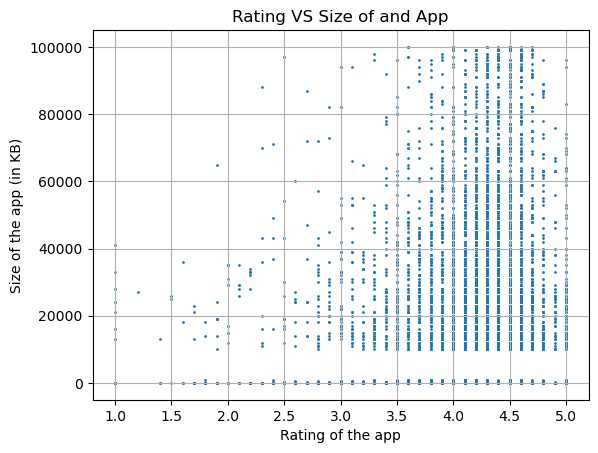

In [12]:
plt.scatter(df1['Rating'], df1['Size'],s =1)
plt.xlabel('Rating of the app')
plt.ylabel('Size of the app (in KB)')
plt.title('Rating VS Size of and App')
plt.grid()
plt.show()

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

### Ans:

In [13]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [14]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [15]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [16]:
char_to_remove = ['$',',','+']
cols_to_clean = ['Installs','Price']
for item in char_to_remove:
    for cols in cols_to_clean:
        df1[cols] = df1[cols].str.replace(item,'')

/tmp/ipykernel_93/3604648229.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[cols] = df1[cols].str.replace(item,'')


In [17]:
df1['Price'] = df1['Price'].astype(float) 

Text(0.5, 1.0, 'Price VS Category')

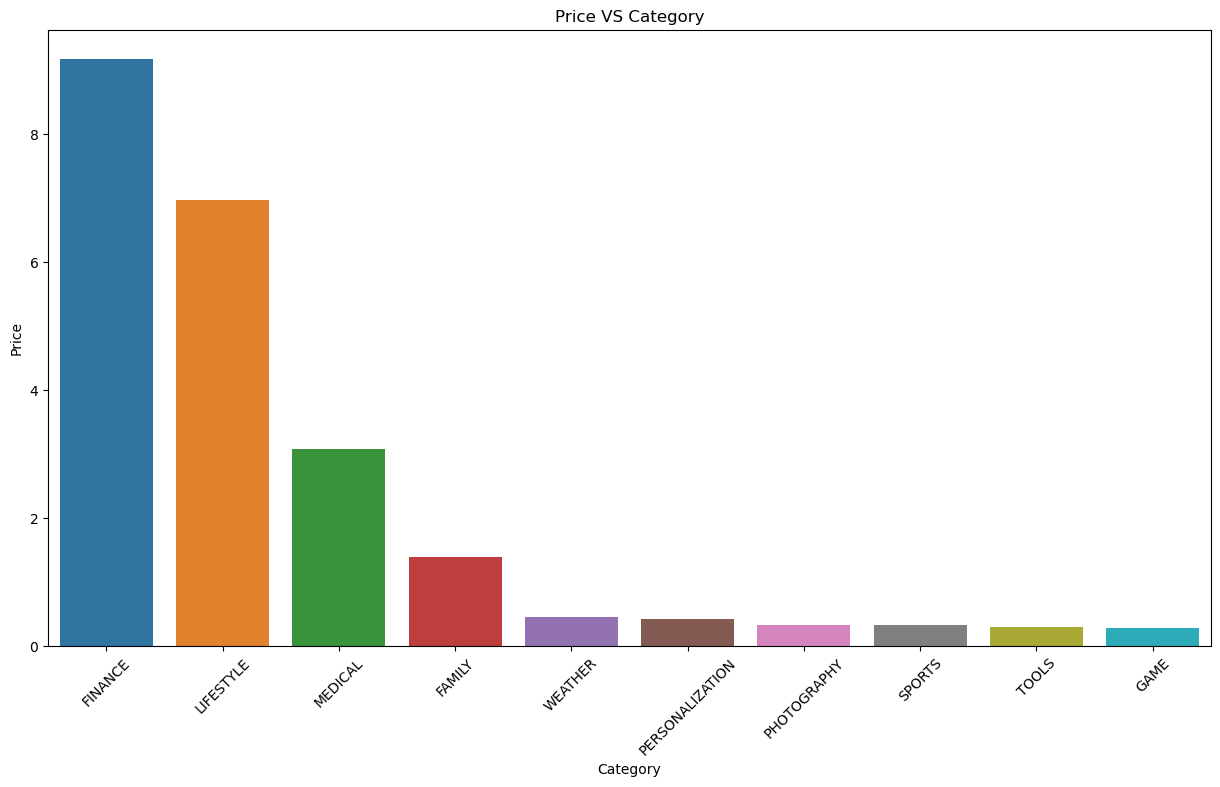

In [18]:
df_cate_price = df1.groupby(['Category'])['Price'].mean().sort_values(ascending = False).reset_index()
df2 = df_cate_price.head(10)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Category',y='Price',data=df2)
plt.xticks(rotation=45)
ax.set_title('Price VS Category')

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

### Ans:

In [19]:
df1['Installs'] = df1['Installs'].astype(int)
df2 = df1[['App','Installs']].value_counts()
print('Top 10 apps by installation number are:')
df2[0:10]

Top 10 apps by installation number are:


App                                                 Installs  
ROBLOX                                              100000000     9
8 Ball Pool                                         100000000     7
Candy Crush Saga                                    500000000     7
Subway Surfers                                      1000000000    6
Helix Jump                                          100000000     6
Temple Run 2                                        500000000     6
Zombie Catchers                                     10000000      6
Nick                                                10000000      6
theScore: Live Sports Scores, News, Stats & Videos  10000000      5
MeetMe: Chat & Meet New People                      50000000      5
dtype: int64

### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

### Ans:

<AxesSubplot: ylabel='Category'>

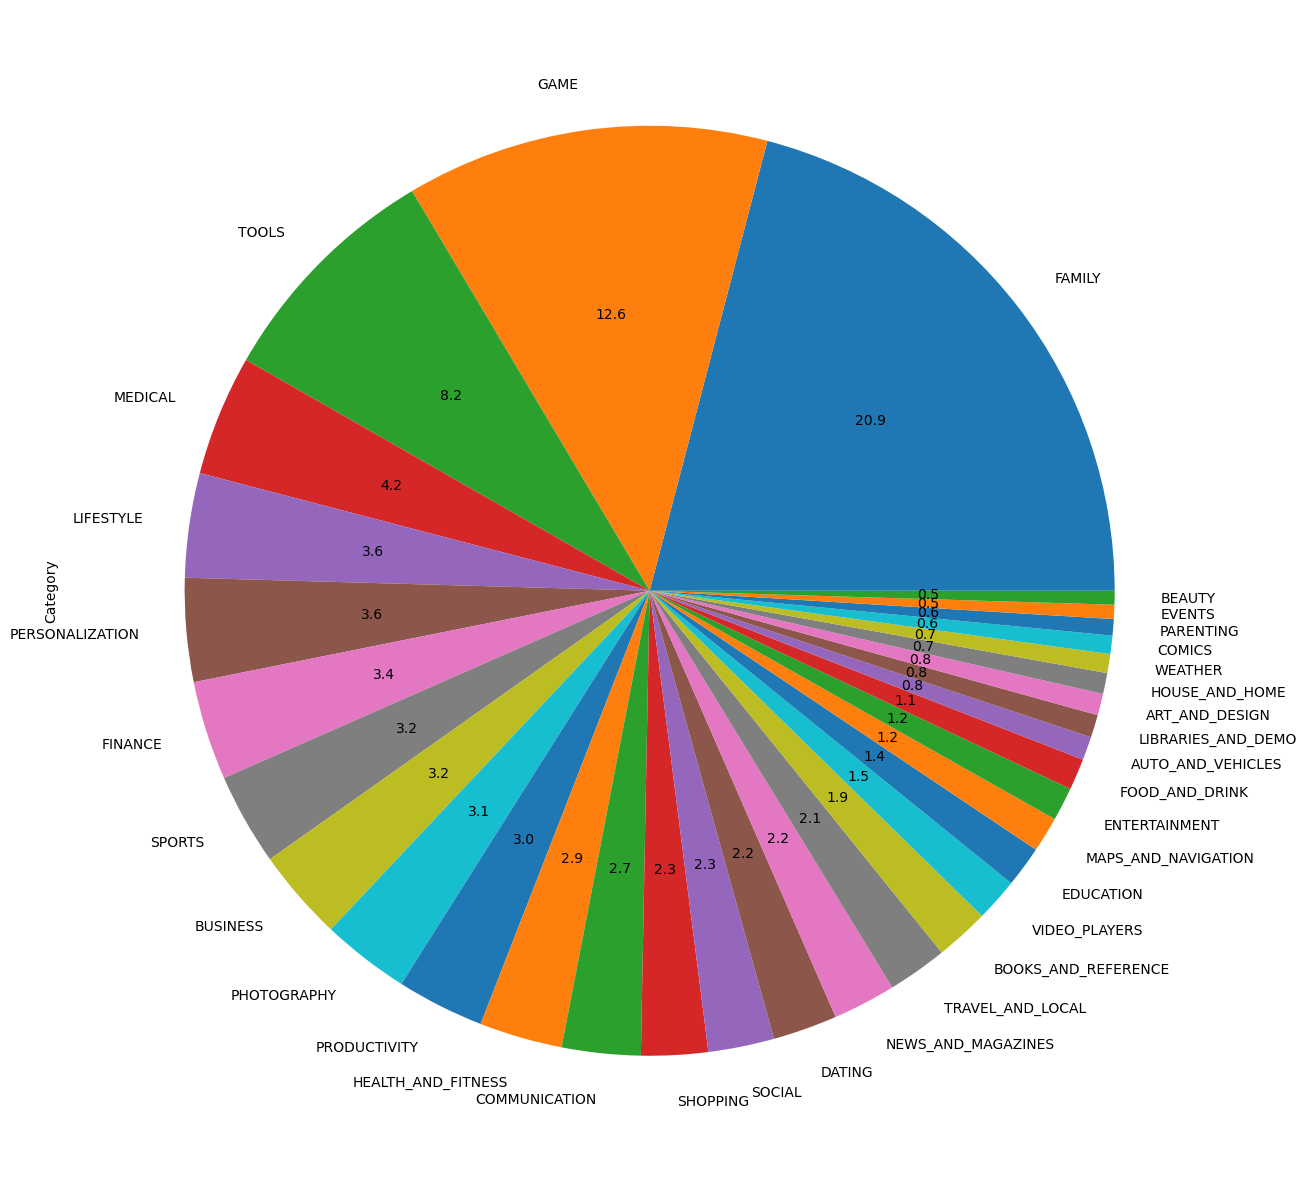

In [20]:
df1['Category'].value_counts().plot.pie(y=df1['Category'],figsize=(15,16),autopct='%1.1f')
# autopct='%1.1f': Prints respective percentages on the figure

In [21]:
## Top 10 App Categories
category = pd.DataFrame(df1['Category'].value_counts()) #Dataframe of apps on the basis of category
print(category)
category.rename(columns = {'Category':'Count'},inplace=True)## Column name is renamed as 'Count'
category

                     Category
FAMILY                   1616
GAME                      974
TOOLS                     633
MEDICAL                   324
LIFESTYLE                 280
PERSONALIZATION           278
FINANCE                   266
SPORTS                    247
BUSINESS                  246
PHOTOGRAPHY               236
PRODUCTIVITY              235
HEALTH_AND_FITNESS        223
COMMUNICATION             211
SHOPPING                  179
SOCIAL                    177
DATING                    173
NEWS_AND_MAGAZINES        169
TRAVEL_AND_LOCAL          160
BOOKS_AND_REFERENCE       144
VIDEO_PLAYERS             116
EDUCATION                 110
MAPS_AND_NAVIGATION        95
ENTERTAINMENT              90
FOOD_AND_DRINK             84
AUTO_AND_VEHICLES          63
LIBRARIES_AND_DEMO         61
ART_AND_DESIGN             58
HOUSE_AND_HOME             56
WEATHER                    51
COMICS                     49
PARENTING                  44
EVENTS                     38
BEAUTY    

,Count
FAMILY,1616
GAME,974
TOOLS,633
MEDICAL,324
LIFESTYLE,280
PERSONALIZATION,278
FINANCE,266
SPORTS,247
BUSINESS,246
PHOTOGRAPHY,236


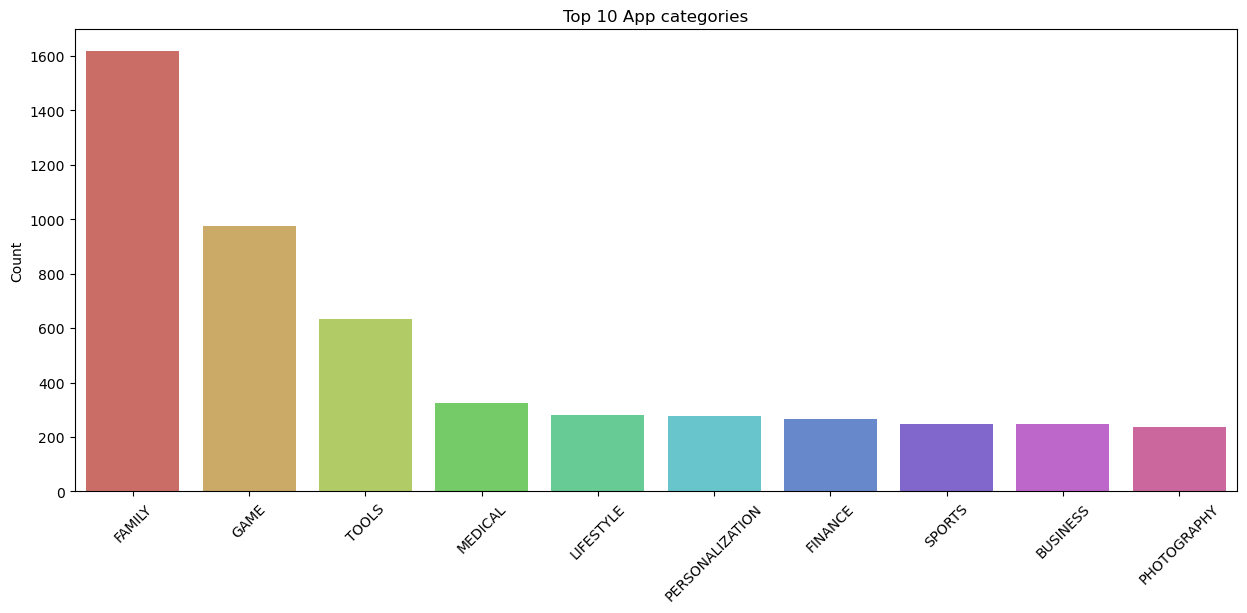

In [22]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=45)
plt.show()

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

### Ans:

In [81]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Installs:

    Analyze the total number of downloads for each app developer. This is a key indicator of success.
    Use a bar chart or a stacked bar chart to show the number of downloads for the top developers.

Ratings and Reviews:

    Evaluate the average user ratings and the number of user reviews for each app developer's apps.
    Create a scatter plot to display the relationship between user ratings and the number of reviews.

App Category:

    Determine which app categories the developer specializes in, as some categories may be more competitive than others.
    Use a pie chart or a bar chart to represent the distribution of app categories for each developer.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Last Update:

    Consider whether frequent app updates positively affect user engagement and downloads.
    Create a line chart to visualize the update frequency and its impact on user engagement.

Installs:

    Analyze the historical monthly download trends for apps in different categories.
    Create a line chart or a time-series graph to visualize the trends in app downloads over time. This can help identify peak download periods.

Ratings and Reviews:

    Examine the average user ratings and the number of user reviews for apps in the same category.
    Use a scatter plot or box-and-whisker plot to illustrate the distribution of ratings and reviews, which can indicate user satisfaction.

App Category:

    Consider the popularity of different app categories and whether there are seasonal trends.
    Use a bar chart or a stacked bar chart to represent the distribution of app categories and their performance over time.